### Case Study 1: How Does a Bike-Share Navigate Speedy Success?

In [1]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
sns.set()

In [2]:
# this function read csv
def get_csv(file):
    data = pd.read_csv(file)
    return data

In [3]:
col=['ride_id','rideable_type','started_at','ended_at','start_station_name','start_station_id','end_station_name'\
                                               ,'end_station_id','start_lat','start_lng','end_lat','end_lng','member_casual']

In [4]:
# extract all csv files into one csv file
def extract():
    extracted_data = pd.DataFrame(columns=col)
    all_files = glob.glob( "*.csv")
    for csv in all_files:
        extracted_data = extracted_data.append(get_csv(csv), ignore_index=True)
        
        
    return extracted_data

In [5]:
# add variable that hold the data fram
df_bikes_2020 = extract()

In [6]:
df_bikes_2020.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,ACB6B40CF5B9044C,electric_bike,2020-10-31 19:39:43,2020-10-31 19:57:12,Lakeview Ave & Fullerton Pkwy,313,Rush St & Hubbard St,125,41.926101,-87.638977,41.890345,-87.626068,casual
1,DF450C72FD109C01,electric_bike,2020-10-31 23:50:08,2020-11-01 00:04:16,Southport Ave & Waveland Ave,227,Kedzie Ave & Milwaukee Ave,260,41.948172,-87.663911,41.929528,-87.707818,casual
2,B6396B54A15AC0DF,electric_bike,2020-10-31 23:00:01,2020-10-31 23:08:22,Stony Island Ave & 67th St,102,University Ave & 57th St,423,41.773462,-87.585372,41.791455,-87.600050,casual
3,44A4AEE261B9E854,electric_bike,2020-10-31 22:16:43,2020-10-31 22:19:35,Clark St & Grace St,165,Broadway & Sheridan Rd,256,41.950855,-87.659244,41.952809,-87.650103,casual
4,10B7DD76A6A2EB95,electric_bike,2020-10-31 19:38:19,2020-10-31 19:54:32,Southport Ave & Wrightwood Ave,190,Stave St & Armitage Ave,185,41.928857,-87.663962,41.917777,-87.691434,casual


In [7]:
#using .info to get all information about the data
df_bikes_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3456907 entries, 0 to 3456906
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 342.9+ MB


In [8]:
# started_at ,ended_at  should be datatime needs to be converted
df_bikes_2020['started_at'] = pd.to_datetime(df_bikes_2020['started_at'])
df_bikes_2020['ended_at'] = pd.to_datetime(df_bikes_2020['ended_at'])

In [9]:
# check again for data types
df_bikes_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3456907 entries, 0 to 3456906
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
dtypes: datetime64[ns](2), float64(4), object(7)
memory usage: 342.9+ MB


In [10]:
#check if there a duplicated values
sum(df_bikes_2020.duplicated())

0

In [11]:
# check for null values
df_bikes_2020.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name     94656
start_station_id       95282
end_station_name      110782
end_station_id        111243
start_lat                  0
start_lng                  0
end_lat                 4156
end_lng                 4156
member_casual              0
dtype: int64

In [12]:
# drope all null values
df_bikes_2020.dropna(inplace=True)

In [13]:
# check again if there any null values
df_bikes_2020.isna().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

In [14]:
df_bikes_2020.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,ACB6B40CF5B9044C,electric_bike,2020-10-31 19:39:43,2020-10-31 19:57:12,Lakeview Ave & Fullerton Pkwy,313,Rush St & Hubbard St,125,41.926101,-87.638977,41.890345,-87.626068,casual
1,DF450C72FD109C01,electric_bike,2020-10-31 23:50:08,2020-11-01 00:04:16,Southport Ave & Waveland Ave,227,Kedzie Ave & Milwaukee Ave,260,41.948172,-87.663911,41.929528,-87.707818,casual
2,B6396B54A15AC0DF,electric_bike,2020-10-31 23:00:01,2020-10-31 23:08:22,Stony Island Ave & 67th St,102,University Ave & 57th St,423,41.773462,-87.585372,41.791455,-87.600050,casual
3,44A4AEE261B9E854,electric_bike,2020-10-31 22:16:43,2020-10-31 22:19:35,Clark St & Grace St,165,Broadway & Sheridan Rd,256,41.950855,-87.659244,41.952809,-87.650103,casual
4,10B7DD76A6A2EB95,electric_bike,2020-10-31 19:38:19,2020-10-31 19:54:32,Southport Ave & Wrightwood Ave,190,Stave St & Armitage Ave,185,41.928857,-87.663962,41.917777,-87.691434,casual


In [15]:
# add new column that will calcualte the minutes for every ride
df_bikes_2020['ride_length'] = abs(df_bikes_2020['ended_at'].dt.minute - df_bikes_2020['started_at'].dt.minute)

In [16]:
# add a column for a month
df_bikes_2020['month'] = df_bikes_2020['started_at'].dt.month_name()

In [17]:
# add a column for day name
df_bikes_2020['day_name'] = df_bikes_2020['started_at'].dt.day_name()

In [18]:
# add start and end stations name together it will be useful for visualizing
df_bikes_2020['startName_endName'] = df_bikes_2020['start_station_name']+":"+df_bikes_2020['end_station_name']

In [19]:
df_bikes_2020.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,month,day_name,startName_endName
0,ACB6B40CF5B9044C,electric_bike,2020-10-31 19:39:43,2020-10-31 19:57:12,Lakeview Ave & Fullerton Pkwy,313,Rush St & Hubbard St,125,41.926101,-87.638977,41.890345,-87.626068,casual,18,October,Saturday,Lakeview Ave & Fullerton Pkwy:Rush St & Hubbar...
1,DF450C72FD109C01,electric_bike,2020-10-31 23:50:08,2020-11-01 00:04:16,Southport Ave & Waveland Ave,227,Kedzie Ave & Milwaukee Ave,260,41.948172,-87.663911,41.929528,-87.707818,casual,46,October,Saturday,Southport Ave & Waveland Ave:Kedzie Ave & Milw...
2,B6396B54A15AC0DF,electric_bike,2020-10-31 23:00:01,2020-10-31 23:08:22,Stony Island Ave & 67th St,102,University Ave & 57th St,423,41.773462,-87.585372,41.791455,-87.600050,casual,8,October,Saturday,Stony Island Ave & 67th St:University Ave & 57...
3,44A4AEE261B9E854,electric_bike,2020-10-31 22:16:43,2020-10-31 22:19:35,Clark St & Grace St,165,Broadway & Sheridan Rd,256,41.950855,-87.659244,41.952809,-87.650103,casual,3,October,Saturday,Clark St & Grace St:Broadway & Sheridan Rd
4,10B7DD76A6A2EB95,electric_bike,2020-10-31 19:38:19,2020-10-31 19:54:32,Southport Ave & Wrightwood Ave,190,Stave St & Armitage Ave,185,41.928857,-87.663962,41.917777,-87.691434,casual,16,October,Saturday,Southport Ave & Wrightwood Ave:Stave St & Armi...


- team will design a new marketing strategy to convert casual riders into annual members. 
- But first, Cyclistic executives must approve your recommendations, 
- so they must be backed up with compelling data insights and professional data visualizations.
- we want to understand the structure of riders
#### what is the percentage for casual,annual memeber ?

In [20]:
#get percentage for casual and member
percentage_casual = round(df_bikes_2020[df_bikes_2020['member_casual']=='casual'].shape[0]/df_bikes_2020.shape[0],2)
percentage_member = round(df_bikes_2020[df_bikes_2020['member_casual']=='member'].shape[0]/df_bikes_2020.shape[0],2)

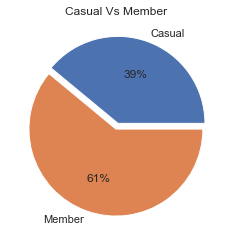

In [21]:
slice = [percentage_casual,percentage_member]
labels = ['Casual','Member']
explode = [0.07,0]
plt.pie(slice,labels = labels,explode=explode,autopct='%1.0f%%')
plt.title("Casual Vs Member")
plt.show()

- the percentage of causal is 39% and the member is 61%
- How customers use our bikes and which stations have the highest percentage of riders?
- what is most common days for ridders?
- what are the maximum, minimum, and average trip durations?
- what is the percentage of a rideable type for casual and member riders?

-----------------------------

In [22]:
# let's a slice for member and casual
df_casual = df_bikes_2020[df_bikes_2020['member_casual']=='casual'].copy()
df_member = df_bikes_2020[df_bikes_2020['member_casual']=='member'].copy()

In [23]:
df_casual.head(2)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,month,day_name,startName_endName
0,ACB6B40CF5B9044C,electric_bike,2020-10-31 19:39:43,2020-10-31 19:57:12,Lakeview Ave & Fullerton Pkwy,313,Rush St & Hubbard St,125,41.926101,-87.638977,41.890345,-87.626068,casual,18,October,Saturday,Lakeview Ave & Fullerton Pkwy:Rush St & Hubbar...
1,DF450C72FD109C01,electric_bike,2020-10-31 23:50:08,2020-11-01 00:04:16,Southport Ave & Waveland Ave,227,Kedzie Ave & Milwaukee Ave,260,41.948172,-87.663911,41.929528,-87.707818,casual,46,October,Saturday,Southport Ave & Waveland Ave:Kedzie Ave & Milw...


## Casual summary Statistics

In [116]:
commont_start_station = df_casual['start_station_name'].mode()[0]
print(f"The most common start stations is: {commont_start_station}")
print('-'*5)
commont_end_station = df_casual['end_station_name'].mode()[0]
print(f"The most common end stations is: {commont_end_station}")
print('-'*5)
start_end = df_casual['startName_endName'].mode()[0]
print(f"The most common start and end stations together are : {start_end}")
avg_ride_length = round(np.average(df_casual['ride_length']),2)
print('-'*5)
max_ride_length = np.max(df_casual['ride_length'])
print(f"The average ride length for casual is {avg_ride_length} minutes")
print('-'*5)
print(f"The max ride length for casual is {max_ride_length} minutes")

The most common start stations is: Streeter Dr & Grand Ave
-----
The most common end stations is: Streeter Dr & Grand Ave
-----
The most common start and end stations together are : Streeter Dr & Grand Ave:Streeter Dr & Grand Ave
-----
The average ride length for casual is 20.79 minutes
-----
The max ride length for casual is 59 minutes


In [134]:
df_casual['month'].value_counts()/df_casual.shape[0]

August       0.221586
July         0.210410
September    0.168574
June         0.120976
October      0.096157
May          0.067933
November     0.057183
March        0.021785
December     0.019224
February     0.010077
January      0.006095
Name: month, dtype: float64

In [136]:
jun_to_sep = .22+.21+.16+.12
print(f"{jun_to_sep} of casual riders use bike from june to sep ")

0.71 of casual riders use bike from june to sep 


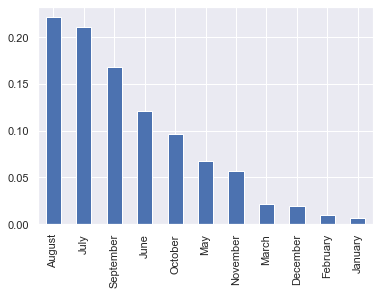

In [98]:
#this bar graph will show us the most common month for casual riders
(df_casual['month'].value_counts()/df_casual.shape[0]).plot(kind='bar');

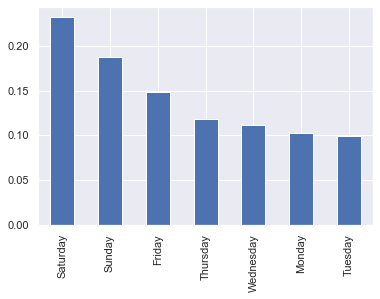

In [99]:
#this bar graph will show us the most common day for casual riders
(df_casual['day_name'].value_counts()/df_casual.shape[0]).plot(kind='bar');

In [88]:
print('How many different Stations in start stations',df_casual['start_station_name'].nunique())
print('How many different Stations in end stations',df_casual['end_station_name'].nunique())

How many different Stations in start stations 687
How many different Stations in end stations 689


In [90]:
# the percentage of top 100 start stations
print("start station percentage",round(df_casual['start_station_name'].value_counts().head(100).sum()/df_casual.shape[0],2))
# the percentage of top 100 end stations
print("end station percentage",round(df_casual['end_station_name'].value_counts().head(100).sum()/df_casual.shape[0],2))

start station percentage 0.54
end station percentage 0.55


- The first 100 station represnt .54% of 687
- The first 100 end represnt .54% of 689

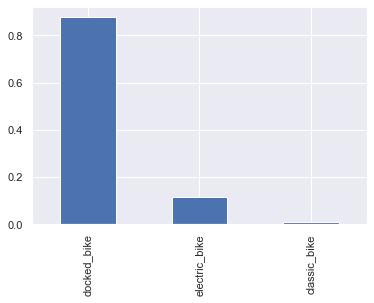

In [102]:
(df_casual['rideable_type'].value_counts()/df_casual.shape[0]).plot(kind='bar');

In [114]:
start_rush_hour = df_casual['started_at'].dt.hour.mode()[0]
end_rush_hour = df_casual['ended_at'].dt.hour.mode()[0]
print("The most common start hour",start_rush_hour)
print("The most common end hour",end_rush_hour)

The most common start hour 17
The most common end hour 17


---------------------


## Member summary Statistics

In [117]:
commont_start_station = df_member['start_station_name'].mode()[0]
print(f"The most common start stations is: {commont_start_station}")
print('-'*5)
commont_end_station = df_member['end_station_name'].mode()[0]
print(f"The most common end stations is: {commont_end_station}")
print('-'*5)
start_end = df_member['startName_endName'].mode()[0]
print(f"The most common start and end stations together are : {start_end}")
avg_ride_length = round(np.average(df_member['ride_length']),2)
print('-'*5)
max_ride_length = np.max(df_member['ride_length'])
print(f"The average ride length for casual is {avg_ride_length} minutes")
print('-'*5)
print(f"The max ride length for casual is {max_ride_length} minutes")

The most common start stations is: Clark St & Elm St
-----
The most common end stations is: Clark St & Elm St
-----
The most common start and end stations together are : MLK Jr Dr & 29th St:State St & 33rd St
-----
The average ride length for casual is 17.72 minutes
-----
The max ride length for casual is 59 minutes


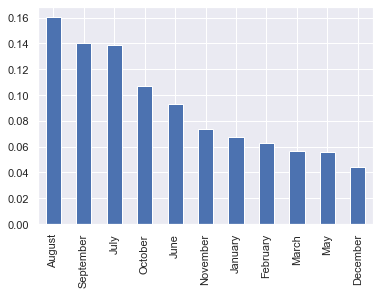

In [118]:
#this bar graph will show us the most common month for member riders
(df_member['month'].value_counts()/df_member.shape[0]).plot(kind='bar');



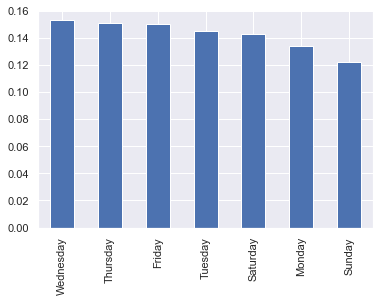

In [119]:
#this bar graph will show us the most common day for member riders
(df_member['day_name'].value_counts()/df_member.shape[0]).plot(kind='bar');


In [120]:

print('How many different Stations in start stations',df_member['start_station_name'].nunique())
print('How many different Stations in end stations',df_member['end_station_name'].nunique())


How many different Stations in start stations 683
How many different Stations in end stations 681


In [121]:

# the percentage of top 100 start stations
print("start station percentage",round(df_member['start_station_name'].value_counts().head(100).sum()/df_member.shape[0],2))
# the percentage of top 100 end stations
print("end station percentage",round(df_member['end_station_name'].value_counts().head(100).sum()/df_member.shape[0],2))


start station percentage 0.49
end station percentage 0.49


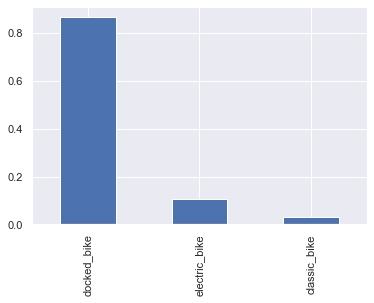

In [122]:
(df_member['rideable_type'].value_counts()/df_member.shape[0]).plot(kind='bar');

In [123]:
start_rush_hour = df_member['started_at'].dt.hour.mode()[0]
end_rush_hour = df_member['ended_at'].dt.hour.mode()[0]
print("The most common start hour",start_rush_hour)
print("The most common end hour",end_rush_hour)

The most common start hour 17
The most common end hour 17


In [130]:
# load functions will transforme the dataframe to csv fiel
def load(data):
    # Write your code here
    data.to_csv("bikes_cleaned.csv",index=False)

In [132]:
load(df_bikes_2020)